***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python Kinetics Code}}$$<br>
$\mathbf{\text{Date: 02/01/22}}$<br>
***

***
$\mathbf{\text{Simple Micro Kinetic Model for CO Oxidation}}:$<br>
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO

$$ CO + * \rightleftharpoons CO^{*} $$

Reaction 2:&emsp;Adsorption of $O_2$

$$ O_2 + * \rightleftharpoons {O_2}^{*} $$

Reaction 3:&emsp;Dissociation of ${O_2}^*$ 

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$

Reaction 4:&emsp;Surface Reaction of $CO$ and $O_2$  

$$ {CO}^{*} + {O}^{*} \rightleftharpoons CO_2 + 2* $$



***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

#### For the Irreversible Case: (Method 1)
Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*}$$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*}  $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O}  $$



#### For the Reversible Case: (Method 2)

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations of the different coverages:

$$r_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$r_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$r_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$r_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$




In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np


def sol(t,u,k1f,k1r,k2f,k2r,k3f,k3r,k4f,k4r,P1,P2,P3):
    # 1 = CO ; 2 = O2 ; 3 = O ; 4 = *
    
    #Surface Coverage 
    th1 = u[0] #Theta_CO 
    th2 = u[1] #Theta_O
    th3 = u[2] #Theta_O2
    th4 = u[3] #Theta_*
    
    #Partial Pressures
    P1 #P_CO
    P2 #P_O2
    P3 #P_CO2

    #Rates of reaction
    r1 = k1f*P1*th4 - k1r*th1
    r2 = k2f*P2*th4 - k2r*th2
    r3 = k3f*th2*(th4) - k3r*(th3**2)
    r4 = k4f*th1*th3 - k4r*P3*(th4**2)


    #Rate of change of surface coverages
    D1 = r1-r4               #Rate of Formation of CO*
    D2 = r2-r3               #Rate of Formation of O_2*
    D3 = (2*r3)-r4           #Rate of Formation of O*
    D4 = (2*r4)-r3-r2-r1     #Rate of Formation of *
    
    return [D1,D2,D3,D4]

# CO ; O2 ; O ; *
init = [0,0,0,1]


P = 1e-8 # 1e-8 #bar
P1 = 1e-8 #P
P2 = 1e-8 #P
P3 = 1e-8 #P

k1f = 2.00e+00
k1r = 6.65e-09
k2f = 2.31e+02
k2r = 1.15e+05
k3f = 6.13e+08
k3r = 2.14e-02
k4f = 2.85e-06
k4r = 5.00e+02

Time =np.linspace(0, 6e6, num=1000)
t_span = (Time[0], Time[-1])
from scipy.integrate import odeint, solve_ivp
solve = solve_ivp(sol,t_span,init,args=(k1f,k1r,k2f,k2r,k3f,k3r,k4f,k4r,P1,P2,P3),method='BDF', rtol = 1E-6,atol = 1E-8)
solv = np.transpose(solve.y)
Time = np.transpose(solve.t)
print(k1f,k2f,k3f,k4f)
print(k1r,k2r,k3r,k4r)

2.0 231.0 613000000.0 2.85e-06
6.65e-09 115000.0 0.0214 500.0


<IPython.core.display.Javascript object>


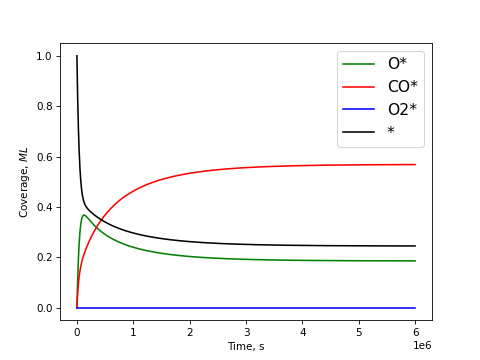

In [6]:
plt.plot(Time, solv[:,2], 'g-', label='O*') 
plt.plot(Time, solv[:,0],'r-', label='CO*')        
plt.plot(Time, solv[:,1],'b-', label='O2*') 
plt.plot(Time, solv[:,3],'k-', label='*') 

#plt.plot(Time, solv[:,3], label='4') 
plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=15, loc='best')
plt.show()